<a href="https://colab.research.google.com/github/lfast1/CHE30324/blob/master/StateSpaceModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# State-Space Models

CBE 30338 Class notes for 2/28/2019

## Install the Python Control Systems Library

This notebook will use functions from the [Python Control Systems Library](https://python-control.readthedocs.io/en/0.8.1/index.html) to work with state-space models. The installation is straightforward but typically takes more time than other library installations. Expect anywhere from 1 to 10 minutes to complete the one-time installation.

### Instructons for Anaconda

In [0]:
#!conda install -c conda-forge control -y

### Instructions for Google Colab

In [0]:
#!pip install slycot
#!pip install control

### Test Installation

The following cell should execute without error if the Python Control Systems Library has been correctly installed.

In [0]:
!python -c "import control"

## Introduction to State-Space Models

A state-space model is one where the dynamics of the **state** $x$ is modeled by a first order differential equation with input $u$

\begin{align*}
\frac{dx}{dt} & = Ax + Bu \\
y & = C x + D u 
\end{align*}

The second equation provides for the case where the process output $y$ is different from the state. Normally $x$, $y$, and $u$ are deviation variables.  $A$, $B$, $C$, and $D$ are parameters.
 

#### Example: Temperature Control Laboratory

As an example, consider our model equation for temperature control lab experiment,

\begin{align*}
C_p \frac{dT}{dt} & = U_a(T_{amb} - T) + P u \\
\end{align*}

We'll define the state as the deviation variable $x = T - T_{amb}$ where we directly measure $x$. The state-space model becomes

\begin{align*}
\frac{dx}{dt} & = \underbrace{-\frac{U_a}{C_p}}_{A} x + \underbrace{\frac{P}{C_p}}_{B} u \\
y  & = \underbrace{(1)}_C x + \underbrace{(0)}_D u
\end{align*}

The next cell shows how to create a state-space model using the Python Control Systems Library using data measured on the Temperature Control Laboratory.  There are many things that can be done with a state-space model, such as plotting the response to unit step input as shown in the next cell.

A = [[-0.00555556]]

B = [[0.30555556]]

C = [[1]]

D = [[0]]



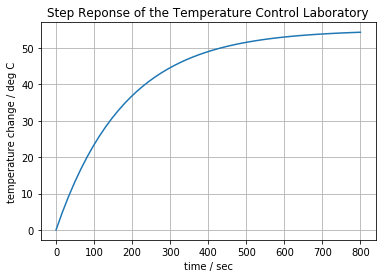

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control

P = 4        # watts
Ua = P/55    # determined from steady-state step response
Cp = 180*Ua  # determined from first-order time constant tau = 250

A = -Ua/Cp
B = P/Cp
C = 1
D = 0

# create the state space model object
tclab = control.StateSpace(A, B, C, D)
print(tclab)

# plot the response to a unit step input
t = np.linspace(0, 800)
t, y = control.step_response(tclab, t)

plt.plot(t,y)
plt.xlabel('time / sec')
plt.ylabel('temperature change / deg C')
plt.title('Step Reponse of the Temperature Control Laboratory')
plt.grid(True)

#### Example: Generic First-Order Process Model

For process control it is useful to define a generic first-order model defined by a characteristic time constant $\tau$ and steady-state gain $K$ that is written as

\begin{align*}
\tau \frac{dy}{dt} + y & = K u \\
\end{align*}

where $u$ is a deviation in a process input, and $y$ is the observed deviation in process response.

This model can be rearranged into state-space form. First identify the state as $x = y$. Then rearrange the equations into the following form

\begin{align*}
\frac{dx}{dt} & = \underbrace{-\frac{1}{\tau}}_{A} x + \underbrace{\frac{K}{\tau}}_{B} u \\
y  & = \underbrace{(1)}_C x + \underbrace{(0)}_D u
\end{align*}

The next cell demonstrates how to plot the step response for a system with a time constant of $\tau=3$ minutes and a gain $K = 12$. Here we let the step response function automatically generate the time grid.

A = [[-0.33333333]]

B = [[4.]]

C = [[1]]

D = [[0]]



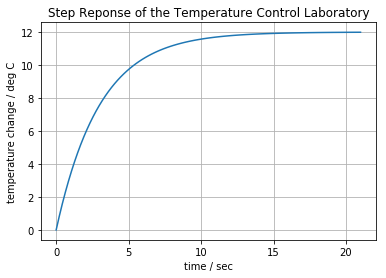

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control 

tau = 3
K = 12

A = -1/tau
B = K/tau
C = 1
D = 0

# create the state space model object
sys = control.StateSpace(A, B, C, D)
print(sys)

# plot the response to a unit step input
t, y = control.step_response(sys)

plt.plot(t,y)
plt.xlabel('time / sec')
plt.ylabel('temperature change / deg C')
plt.title('Step Reponse of the Temperature Control Laboratory')
plt.grid(True)

### Exercises

1. Create a state space model for a gravity drained tank.

## Multivariable State Space Models


### Temperature Control Lab

\begin{align*}
C^H_p \frac{dT_H}{dt} & = U_a (T_{amb} - T_H) + U_c(T_S - T_H) + P u \\
C^S_p \frac{dT_S}{dt} & = U_c(T_H - T_S)
\end{align*}

Define two state variables where $x_1 = T_H - T_{amb}$ refers to deviations in the heater temperature from room temperature due to the heater input, and $x_2 = T_S - T_{amb}$ is the deviation in the sensor temperature from room temperature.  Because $x_1$ and $x_2$ use the same reference for computing deviations, $T_S - T_H = x_2 - x_1$.  

\begin{align*}
C^H_p \frac{dx_1}{dt} & = -U_a x_1 + U_c(x_2 - x_1) + P u \\
C^S_p \frac{dT_S}{dt} & = U_c(x_1 - x_2)
\end{align*}

Gathering terms in $x_1$ and $x_2$, and adding an algebraic equation to show how the available measurements are related to the state variables

\begin{align*}
\frac{dx_1}{dt} & = -\frac{(U_a + U_c)}{C^H_p} x_1 + \frac{U_c}{C^H_p} x_2 + P u \\
\frac{dx_2}{dt} & = \frac{U_c}{C^S_p} x_1 -  \frac{U_c}{C^S_p} x_2 \\
y & = x_2
\end{align*}

The next step is streamline this model using a matrix/vector notation

\begin{align*}
\frac{d}{dt}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} & = 
\begin{bmatrix} -\frac{(U_a + U_c)}{C^H_p} & \frac{U_c}{C^H_p} \\ \frac{U_c}{C^S_p} & -\frac{U_c}{C^S_p} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} +
\begin{bmatrix} P \\ 0 \end{bmatrix} u \\
y & = \begin{bmatrix} 0 &  1 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + \begin{bmatrix} 0 \end{bmatrix} u
\end{align*}

Next, let's label the matrices and vectors

\begin{align*}
\frac{d}{dt}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} & = 
\underbrace{\begin{bmatrix} -\frac{(U_a + U_c)}{C^H_p} & \frac{U_c}{C^H_p} \\ \frac{U_c}{C^S_p} & -\frac{U_c}{C^S_p} \end{bmatrix}}_A \underbrace{\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}}_x +
\underbrace{\begin{bmatrix} P \\ 0 \end{bmatrix}}_B u \\
y & = \underbrace{\begin{bmatrix} 0 &  1 \end{bmatrix}}_C 
\underbrace{\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}}_x + \underbrace{\begin{bmatrix} 0 \end{bmatrix}}_D u
\end{align*}



A = [[-0.33333333]]

B = [[4.]]

C = [[1]]

D = [[0]]



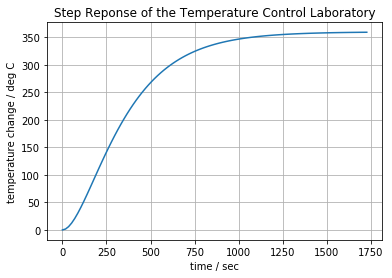

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control 

u = 0.5
P = 4*u        # watts
Ua = P/55      # determined from steady-state step response
CpH = 180*Ua   # determined from first-order time constant tau = 250
Uc = 0.1*Ua    # estimate
CpS = 0.1*CpH  # 

A = [[-(Ua + Uc)/CpH, Uc/CpH], [Uc/CpS, -Uc/CpS]]
B = [[P], [0]]
C = [[0, 1]]
D = [[0]]

# create the state space model object
tclab2 = control.StateSpace(A, B, C, D)
print(sys)

# plot the response to a unit step input
t, y = control.step_response(tclab2)

plt.plot(t,y)
plt.xlabel('time / sec')
plt.ylabel('temperature change / deg C')
plt.title('Step Response of the Temperature Control Laboratory')
plt.grid(True)

### Exercise

Create a state space model for the coupled tank examples in the textbook.

## Fitting TCLab Model

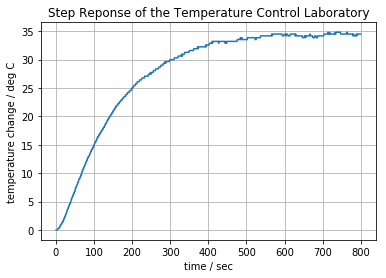

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# read data from saved spreadsheet (.csv) file
data = pd.read_csv('Step_Test_Data.csv').set_index('Time')[1:]
tdata = data.index
Tdata = data['T1'].values

# interpolate to an evenly spaced time grid
t = np.linspace(min(tdata), max(tdata), len(tdata))
ydata = np.interp(t, tdata, Tdata-Tdata[0])

# plot data
plt.plot(t, ydata)
plt.xlabel('time / sec')
plt.ylabel('temperature change / deg C')
plt.title('Experimental Response of the Temperature Control Laboratory')
plt.grid(True)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from ipywidgets import interact

P = 4*0.5          # watts
Ua = P/55      # determined from steady-state step response
CpH = 180*Ua   # determined from first-order time constant tau = 250
Uc = 0.1*Ua    # estimate
CpS = 0.1*CpH  # 

def compare(Ua, Uc, CpH, CpS):

    print('Ua = ' + str(Ua), '\nUc = ' + str(Uc),
          '\nCpH = ' + str(CpH), '\nCpH = ' + str(CpS))
        
    A = [[-(Ua + Uc)/CpH, Uc/CpH], [Uc/CpS, -Uc/CpS]]
    B = [[P/CpH], [0]]
    C = [[0, 1]]
    D = [[0]]

    # create the state space model object
    tclab2 = control.StateSpace(A, B, C, D)

    # plot the response to a unit step input
    t = np.linspace(min(tdata), max(tdata), len(tdata))
    t, y, x = control.step_response(tclab2, t, return_x=True)
    err = np.linalg.norm(x[1] - ydata)

    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, x[0], t, x[1])
    plt.plot(t, ydata)
    plt.legend(['Heater', 'Sensor'])
    plt.xlabel('time / sec')
    plt.ylabel('temperature change / deg C')
    plt.title('Step Reponse of the Temperature Control Laboratory')
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(t, x[1]-ydata)
    plt.title('Error = ' + str(round(err,3)))
    plt.grid(True)
    plt.tight_layout()
    
interact(compare,
    Ua=(0,0.08,0.001), 
    Uc=(0,0.06,0.001), 
    CpH=(3,11,0.1), 
    CpS = (0.1,2,.01))

interactive(children=(FloatSlider(value=0.04, description='Ua', max=0.08, step=0.001), FloatSlider(value=0.03,…

<function __main__.compare(Ua, Uc, CpH, CpS)>

## Fitting a Generic Second Order Model

A generic model for a stable second order system is given the form
\begin{align*}
\tau^2 \frac{d^2y}{dt^2} + 2\zeta\tau\frac{dy}{dt} + y & = K u
\end{align*}

where $K$ is the steady-state gain, $\tau$ is a time constant, and $\zeta$ is the damping factor. A value of $0 \leq \zeta \lt 1$ corresponds to an **underdamped** system, a value $\zeta > 1$ is **overdamped**, and a value $\zeta = 1$ separating these two categories is called **critically** damped.

Now we'll show how this system can written as a state-space model with two states. Start by choosing

\begin{align*}
x_1 & = y \\
x_2 & = \frac{dy}{dt}
\end{align*}

Taking derivatives

\begin{align*}
\frac{dx_1}{dt} & = \frac{dy}{dt} = x_2 \\
\frac{dx_2}{dt} & = \frac{d^2y}{dt^2} = -\frac{1}{\tau^2}x_1 - \frac{2\zeta}{\tau}x_2 + \frac{K}{\tau^2} u
\end{align*}

From here we can write out a state-space version of this model

\begin{align*}
\frac{d}{dt}\begin{bmatrix}x_1 \\ x_2\end{bmatrix} & =
\underbrace{\begin{bmatrix}0 & 1 \\ -\frac{1}{\tau^2} & - \frac{2\zeta}{\tau}\end{bmatrix}}_A \underbrace{\begin{bmatrix}x_1 \\ x_2\end{bmatrix}}_x + \underbrace{\begin{bmatrix} 0 \\ \frac{K}{\tau^2}\end{bmatrix}}_B u \\
y & = \underbrace{\begin{bmatrix}1 & 0\end{bmatrix}}_C \underbrace{\begin{bmatrix}x_1 \\ x_2\end{bmatrix}}_x + \underbrace{\begin{bmatrix}0\end{bmatrix}}_D u
\end{align*}

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from ipywidgets import interact

# read data from saved spreadsheet (.csv) file
data = pd.read_csv('Step_Test_Data.csv').set_index('Time')[1:]
tdata = data.index
Tdata = data['T1'].values

# interpolate to an evenly spaced time grid
t = np.linspace(min(tdata), max(tdata), len(tdata))
ydata = np.interp(t, tdata, Tdata-Tdata[0])

K = 35        # determined from first-order time constant tau = 250
tau = 150      # time constant
zeta = 1      # determined from steady-state step response

def compare(K, tau, zeta):

    print('K = ' + str(K), '\ntau = ' + str(tau), '\nzeta = ' + str(zeta))
        
    A = [[0, 1], [-1/tau**2, -2*zeta/tau]]
    B = [[0], [K/tau**2]]
    C = [[1, 0]]
    D = [[0]]

    # create the state space model object
    tclab2 = control.StateSpace(A, B, C, D)

    # plot the response to a unit step input
    t = np.linspace(min(tdata), max(tdata), len(tdata))
    t, y = control.step_response(tclab2, t)
    err = np.linalg.norm(x[1] - ydata)

    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, y)
    plt.plot(t, ydata)
    plt.legend(['Heater', 'Sensor'])
    plt.xlabel('time / sec')
    plt.ylabel('temperature change / deg C')
    plt.title('Step Reponse of the Temperature Control Laboratory')
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(t, y-ydata)
    plt.title('Error = ' + str(round(err,3)))
    plt.grid(True)
    plt.tight_layout()
    
interact(compare,
    K = (0, 50, .5), 
    tau = (10, 180, 2), 
    zeta = (0, 3, .03))

interactive(children=(FloatSlider(value=25.0, description='K', max=50.0, step=0.5), IntSlider(value=94, descri…

<function __main__.compare(K, tau, zeta)>

## Two First Order Systems in Series

\begin{align*}
\tau_1\frac{dy_1}{dt} + y_1 & = K_1 u \\
\tau_2\frac{dy_2}{dt} + y_2 & = K_2 y_1 
\end{align*}

Recasting as a state-space model

\begin{align*}
\frac{d}{dt}\begin{bmatrix}x_1 \\ x_2\end{bmatrix} & =
\underbrace{\begin{bmatrix}-\frac{1}{\tau_1} & 0 \\ \frac{K_2}{\tau_2} & - \frac{1}{\tau_2}\end{bmatrix}}_A \underbrace{\begin{bmatrix}x_1 \\ x_2\end{bmatrix}}_x + \underbrace{\begin{bmatrix} \frac{K_1}{\tau_1} \\ 0\end{bmatrix}}_B u \\
y & = \underbrace{\begin{bmatrix}0 & 1\end{bmatrix}}_C \underbrace{\begin{bmatrix}x_1 \\ x_2\end{bmatrix}}_x + \underbrace{\begin{bmatrix}0\end{bmatrix}}_D u
\end{align*}

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from ipywidgets import interact

# read data from saved spreadsheet (.csv) file
data = pd.read_csv('Step_Test_Data.csv').set_index('Time')[1:]
tdata = data.index
Tdata = data['T1'].values

# interpolate to an evenly spaced time grid
t = np.linspace(min(tdata), max(tdata), len(tdata))
ydata = np.interp(t, tdata, Tdata-Tdata[0])

K = 35        # determined from first-order time constant tau = 250
tau1 = 80      # time constant
tau2 = 20     # determined from steady-state step response

def compare(K, tau1, tau2):

    print('K = ' + str(K), '\ntau1 = ' + str(tau1), '\ntau2 = ' + str(tau2))
        
    A = [[0, -1/tau1], [1/tau2, -1/tau2]]
    B = [[K/tau1], [0]]
    C = [[0, 1]]
    D = [[0]]

    # create the state space model object
    tclab2 = control.StateSpace(A, B, C, D)

    # plot the response to a unit step input
    t = np.linspace(min(tdata), max(tdata), len(tdata))
    t, y = control.step_response(tclab2, t)
    err = np.linalg.norm(x[1] - ydata)

    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, y)
    plt.plot(t, ydata)
    plt.legend(['Heater', 'Sensor'])
    plt.xlabel('time / sec')
    plt.ylabel('temperature change / deg C')
    plt.title('Step Reponse of the Temperature Control Laboratory')
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(t, y-ydata)
    plt.title('Error = ' + str(round(err,3)))
    plt.grid(True)
    plt.tight_layout()
    
interact(compare,
    K = (0, 50, .5), 
    tau1 = (10, 180, 2), 
    tau2 = (10, 180, 2))

interactive(children=(FloatSlider(value=25.0, description='K', max=50.0, step=0.5), IntSlider(value=94, descri…

<function __main__.compare(K, tau1, tau2)>

In [0]:
tclab2

A = [[-0.00611111  0.00055556]
 [ 0.00555556 -0.00555556]]

B = [[4]
 [0]]

C = [[0 1]]

D = [[0]]

In [0]:
t, y = control.